In [121]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
import geopandas as gpd
import scipy
import numpy as np 
import swifter
import re 
from collections import Counter 

%matplotlib inline


In [122]:
pwd

'/Users/Erika/Desktop/General_Assembly/Capstone'

In [123]:
#cd Users/Erika/Downloads

In [124]:
condocalc = pd.read_csv('DOF__Cooperative_Comparable_Rental_Income__Citywide_.csv')

In [125]:
condos = condocalc.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 59]]

In [126]:
comparable1 = condocalc.iloc[:,[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 59]]
comparable2 = condocalc.iloc[:,[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 59]]
comparable3 = condocalc.iloc[:,44:60]

In [127]:
#I am inputting the 'Estimated' column 0 equals not estimated and 1 is estimated 
comparable1['Estimated'] = 0
comparable2['Estimated'] = 0 
comparable3['Estimated'] = 0
condos['Estimated'] = 1
condos['Distance from Co-op in miles'] = 0.0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [348]:
condocalc

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,...,Gross SqFt 3,Estimated Gross Income 3,Gross Income per SqFt 3,Estimated Expense 3,Expense per SqFt 3,Net Operating Income 3,Full Market Value 3,Market Value per SqFt 3,Distance from Co-op in miles 2,Report Year
0,1-00011-0014,26 BEAVER STREET,FINANCIAL,D4-ELEVATOR,21,1909,51387,1780046,34.64,448095,...,31118.0,771607.0,24.80,187390.0,6.02,584217.0,4385000.0,140.92,0.37,2012
1,1-00028-0001,3 HANOVER SQUARE,FINANCIAL,D0-ELEVATOR,211,1926,239121,6578219,27.51,1602111,...,222000.0,7153372.0,32.22,1184231.0,5.33,5969141.0,45067000.0,203.00,0.21,2012
2,1-00064-0008,53 LIBERTY STREET,FINANCIAL,D4-ELEVATOR,92,1911,167448,5398524,32.24,1461821,...,160000.0,5328325.0,33.30,1895424.0,11.85,3432901.0,25918000.0,161.99,0.15,2012
3,1-00065-0017,176 BROADWAY,FINANCIAL,D4-ELEVATOR,83,1927,168176,5600261,33.30,1992886,...,187368.0,7665420.0,40.91,1461850.0,7.80,6203570.0,46837000.0,249.97,1.34,2012
4,1-00094-0001,80 GOLD STREET,SOUTHBRIDGE,D4-ELEVATOR,1664,1971,2075590,37256841,17.95,14238547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
5,1-00100-0026,138 NASSAU STREET,SOUTHBRIDGE,D4-ELEVATOR,43,1901,79422,2360422,29.72,585340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
6,1-00101-0001,36 PARK ROW,SOUTHBRIDGE,D4-ELEVATOR,51,1900,111685,4756664,42.59,1203964,...,111184.0,5147164.0,46.29,1445424.0,13.00,3701740.0,27948000.0,251.37,0.27,2012
7,1-00106-0007,266 WATER STREET,SOUTHBRIDGE,D0-ELEVATOR,24,1900,41203,1487840,36.11,416974,...,33500.0,1209601.0,36.11,338906.0,10.12,870695.0,6574000.0,196.24,0.67,2012
8,1-00117-0001,185 PARK ROW,CIVIC CENTER,D4-ELEVATOR,880,1960,515425,17220349,33.41,5551127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
9,1-00134-0025,258 BROADWAY,CIVIC CENTER,D4-ELEVATOR,46,1915,88320,3506304,39.70,792230,...,58354.0,2087396.0,35.77,742339.0,12.72,1345057.0,10155000.0,174.02,0.29,2012


In [345]:
condocalc.columns

Index(['Boro-Block-Lot', 'Address', 'Neighborhood', 'Building Classification',
       'Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income',
       'Gross Income per SqFt', 'Estimated Expense', 'Expense per SqFt',
       'Net Operating Income', 'Full Market Value', 'Market Value per SqFt',
       'Boro-Block-Lot 1', 'Address 1', 'Neighborhood 1',
       'Building Classification 1', 'Total Units 1', 'Year Built 1',
       'Gross SqFt 1', 'Estimated Gross Income 1', 'Gross Income per SqFt 1',
       'Estimated Expense 1', 'Expense per SqFt 1', 'Net Operating Income 1',
       'Full Market Value 1', 'Market Value per SqFt 1',
       'Distance from Co-op in miles', 'Boro-Block-Lot 2', 'Address 2',
       'Neighborhood 2', 'Building Classification 2', 'Total Units 2',
       'Year Built 2', 'Gross SqFt 2', 'Estimated Gross Income 2',
       'Gross Income per SqFt 2', 'Estimated Expense 2', 'Expense per SqFt 2',
       'Net Operating Income 2', 'Full Market Value 2',
       'Ma

In [329]:
print(comparable1.shape)
print(comparable2.shape)
print(comparable3.shape)
print(condos.shape)

(31348, 18)
(31092, 18)
(24470, 18)
(31348, 18)


In [330]:
comparable1['Condo Reference'] = range(0,31348)
comparable2['Condo Reference'] = range(0,31348)
comparable3['Condo Reference'] = range(0, 31348)
condos['Condo Reference'] = range(0, 31348)

ValueError: Length of values does not match length of index

In [130]:
print(comparable1.shape)
print(comparable2.shape)
print(comparable3.shape)
print(condos.shape)

(31348, 18)
(31348, 18)
(31348, 18)
(31348, 18)


In [131]:
comparable2 = comparable2.dropna()
comparable3 = comparable3.dropna()

In [132]:
print(comparable2.shape)
print(comparable3.shape)

(31092, 18)
(24470, 18)


In [133]:
comparable1 = comparable1.rename(columns={'Boro-Block-Lot 1': 'Boro-Block-Lot',
                  'Address 1': 'Address', 
                  'Neighborhood 1': 'Neighborhood',
                  'Building Classification 1': 'Building Classification',
                   'Total Units 1': 'Total Units',
                   'Year Built 1': 'Year Built', 
                   'Gross SqFt 1': 'Gross SqFt', 
                   'Estimated Gross Income 1': 'Estimated Gross Income',
                   'Gross Income per SqFt 1': 'Gross Income per SqFt', 
                   'Estimated Expense 1': 'Estimated Expense', 
                   'Expense per SqFt 1': 'Expense per SqFt', 
                   'Net Operating Income 1': 'Net Operating Income', 
                   'Full Market Value 1': 'Full Market Value', 
                   'Market Value per SqFt 1': 'Market Value per SqFt'})
    

In [134]:
comparable2 = comparable2.rename(columns={'Boro-Block-Lot 2': 'Boro-Block-Lot',
                  'Address 2': 'Address', 
                  'Neighborhood 2': 'Neighborhood',
                  'Building Classification 2': 'Building Classification',
                   'Total Units 2': 'Total Units',
                   'Year Built 2': 'Year Built', 
                   'Gross SqFt 2': 'Gross SqFt', 
                   'Estimated Gross Income 2': 'Estimated Gross Income',
                   'Gross Income per SqFt 2': 'Gross Income per SqFt', 
                   'Estimated Expense 2': 'Estimated Expense', 
                   'Expense per SqFt 2': 'Expense per SqFt', 
                   'Net Operating Income 2': 'Net Operating Income', 
                   'Full Market Value 2': 'Full Market Value', 
                   'Market Value per SqFt 2': 'Market Value per SqFt'})
    

In [135]:
comparable3 = comparable3.rename(columns={'Boro-Block-Lot 3': 'Boro-Block-Lot',
                  'Address 3': 'Address', 
                  'Neighborhood 3': 'Neighborhood',
                  'Building Classification 3': 'Building Classification',
                   'Total Units 3': 'Total Units',
                   'Year Built 3': 'Year Built', 
                   'Gross SqFt 3': 'Gross SqFt', 
                   'Estimated Gross Income 3': 'Estimated Gross Income',
                   'Gross Income per SqFt 3': 'Gross Income per SqFt', 
                   'Estimated Expense 3': 'Estimated Expense', 
                   'Expense per SqFt 3': 'Expense per SqFt', 
                   'Net Operating Income 3': 'Net Operating Income', 
                   'Full Market Value 3': 'Full Market Value', 
                   'Market Value per SqFt 3': 'Market Value per SqFt'})

In [136]:
comparable2 = comparable2.rename(columns={'Distance from Co-op in miles 1': 'Distance from Co-op in miles'})
comparable3 = comparable3.rename(columns={'Distance from Co-op in miles 2': 'Distance from Co-op in miles'})


In [137]:
frames = [comparable1, comparable2, comparable3]
comparablerentals = pd.concat(frames, axis=0)

In [138]:
comparablerentals.isnull().sum()

Boro-Block-Lot                  0
Address                         0
Neighborhood                    0
Building Classification         0
Total Units                     0
Year Built                      0
Gross SqFt                      0
Estimated Gross Income          1
Gross Income per SqFt           0
Estimated Expense               1
Expense per SqFt                0
Net Operating Income            3
Full Market Value               0
Market Value per SqFt           0
Distance from Co-op in miles    1
Report Year                     0
Estimated                       0
Condo Reference                 0
dtype: int64

In [139]:
bldgs = [comparablerentals, condos]
allbuildings = pd.concat(bldgs, axis=0, sort=False)

In [140]:
allbuildings.columns

Index(['Boro-Block-Lot', 'Address', 'Neighborhood', 'Building Classification',
       'Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income',
       'Gross Income per SqFt', 'Estimated Expense', 'Expense per SqFt',
       'Net Operating Income', 'Full Market Value', 'Market Value per SqFt',
       'Distance from Co-op in miles', 'Report Year', 'Estimated',
       'Condo Reference'],
      dtype='object')

In [141]:
allbuildings.shape

(118258, 18)

In [144]:
allbuildings.isnull().sum()

Boro-Block-Lot                  0
Address                         0
Neighborhood                    0
Building Classification         0
Total Units                     0
Year Built                      0
Gross SqFt                      0
Estimated Gross Income          1
Gross Income per SqFt           0
Estimated Expense               1
Expense per SqFt                0
Net Operating Income            3
Full Market Value               0
Market Value per SqFt           0
Distance from Co-op in miles    1
Report Year                     0
Estimated                       0
Condo Reference                 0
dtype: int64

(array([1.6752e+04, 1.9101e+04, 1.3138e+04, 9.7490e+03, 7.5370e+03,
        5.8880e+03, 2.7940e+03, 2.0960e+03, 1.5730e+03, 1.3420e+03,
        1.3130e+03, 1.0930e+03, 6.9600e+02, 5.3900e+02, 3.9400e+02,
        4.2200e+02, 4.1300e+02, 3.6100e+02, 1.5100e+02, 1.0000e+02,
        9.0000e+01, 1.0100e+02, 7.0000e+01, 7.1000e+01, 5.1000e+01,
        5.4000e+01, 6.3000e+01, 5.2000e+01, 3.9000e+01, 6.6000e+01,
        4.6000e+01, 3.3000e+01, 3.9000e+01, 3.6000e+01, 3.6000e+01,
        3.3000e+01, 4.1000e+01, 3.5000e+01, 3.0000e+01, 2.5000e+01,
        3.3000e+01, 6.1000e+01, 4.2000e+01, 5.4000e+01, 3.7000e+01,
        2.6000e+01, 1.1000e+01, 9.0000e+00, 1.1000e+01, 1.1000e+01,
        6.0000e+00, 7.0000e+00, 1.0000e+01, 9.0000e+00, 8.0000e+00,
        6.0000e+00, 1.8000e+01, 1.2000e+01, 7.0000e+00, 6.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        4.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.00

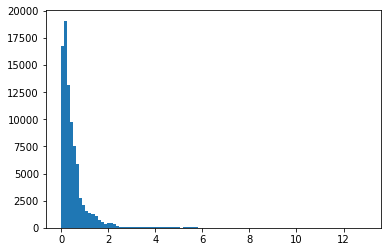

In [145]:
plt.hist(comparablerentals['Distance from Co-op in miles'], bins=100)

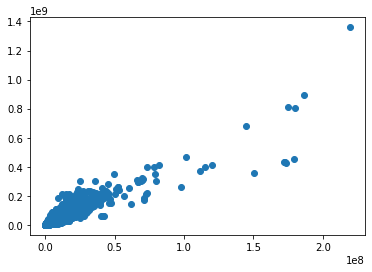

In [146]:
plt.scatter(allbuildings['Estimated Gross Income'], allbuildings['Full Market Value'])

In [147]:
allbuildings.dropna(inplace=True)

In [148]:
allbuildings.fillna(value=np.nan, inplace=True)
#sns.heatmap(allbuildings, annot=True)

In [149]:
#sns.heatmap(allbuildings, annot=True)

In [150]:
allbuildings.dtypes

Boro-Block-Lot                   object
Address                          object
Neighborhood                     object
Building Classification          object
Total Units                     float64
Year Built                      float64
Gross SqFt                      float64
Estimated Gross Income          float64
Gross Income per SqFt           float64
Estimated Expense               float64
Expense per SqFt                float64
Net Operating Income            float64
Full Market Value               float64
Market Value per SqFt           float64
Distance from Co-op in miles    float64
Report Year                       int64
Estimated                         int64
Condo Reference                   int64
dtype: object

In [151]:
corr = allbuildings[['Total Units', 'Year Built', 'Gross SqFt',\
                         'Estimated Gross Income', 'Gross Income per SqFt', \
                         'Estimated Expense', 'Expense per SqFt', 'Net Operating Income',\
                         'Full Market Value', 'Market Value per SqFt', 'Distance from Co-op in miles']].corr()

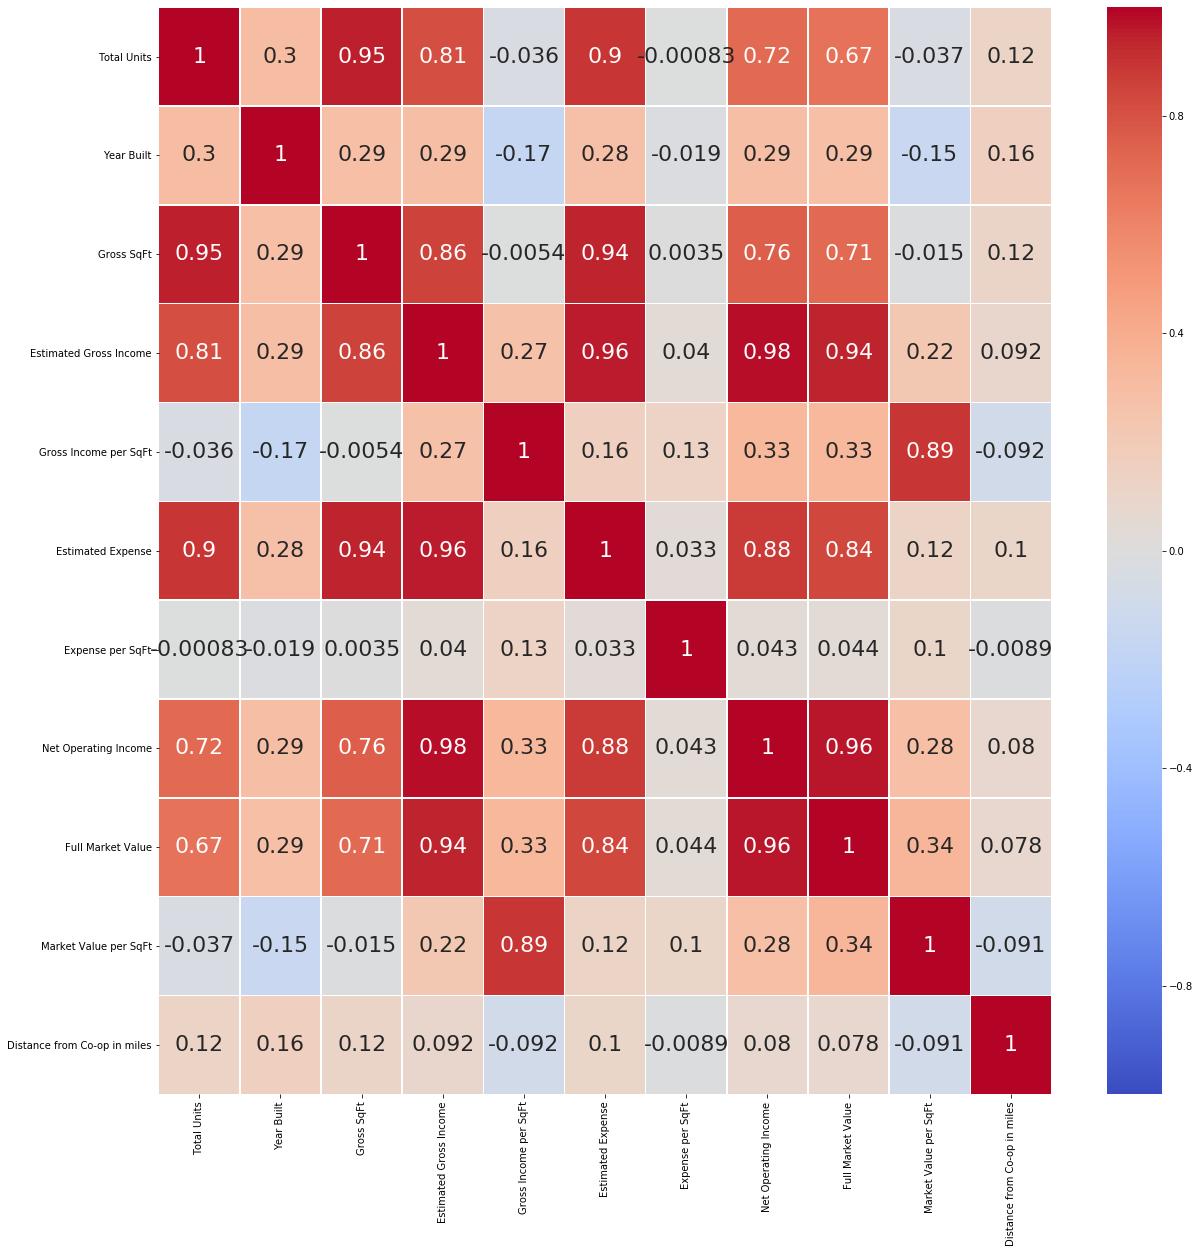

In [152]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=.5, vmin=-1, cmap='coolwarm', annot_kws={'fontsize':22})

In [153]:
corr2 = comparablerentals[['Total Units', 'Year Built', 'Gross SqFt',\
                         'Estimated Gross Income', 'Gross Income per SqFt', \
                         'Estimated Expense', 'Expense per SqFt', 'Net Operating Income',\
                         'Full Market Value', 'Market Value per SqFt', 'Distance from Co-op in miles']].corr()

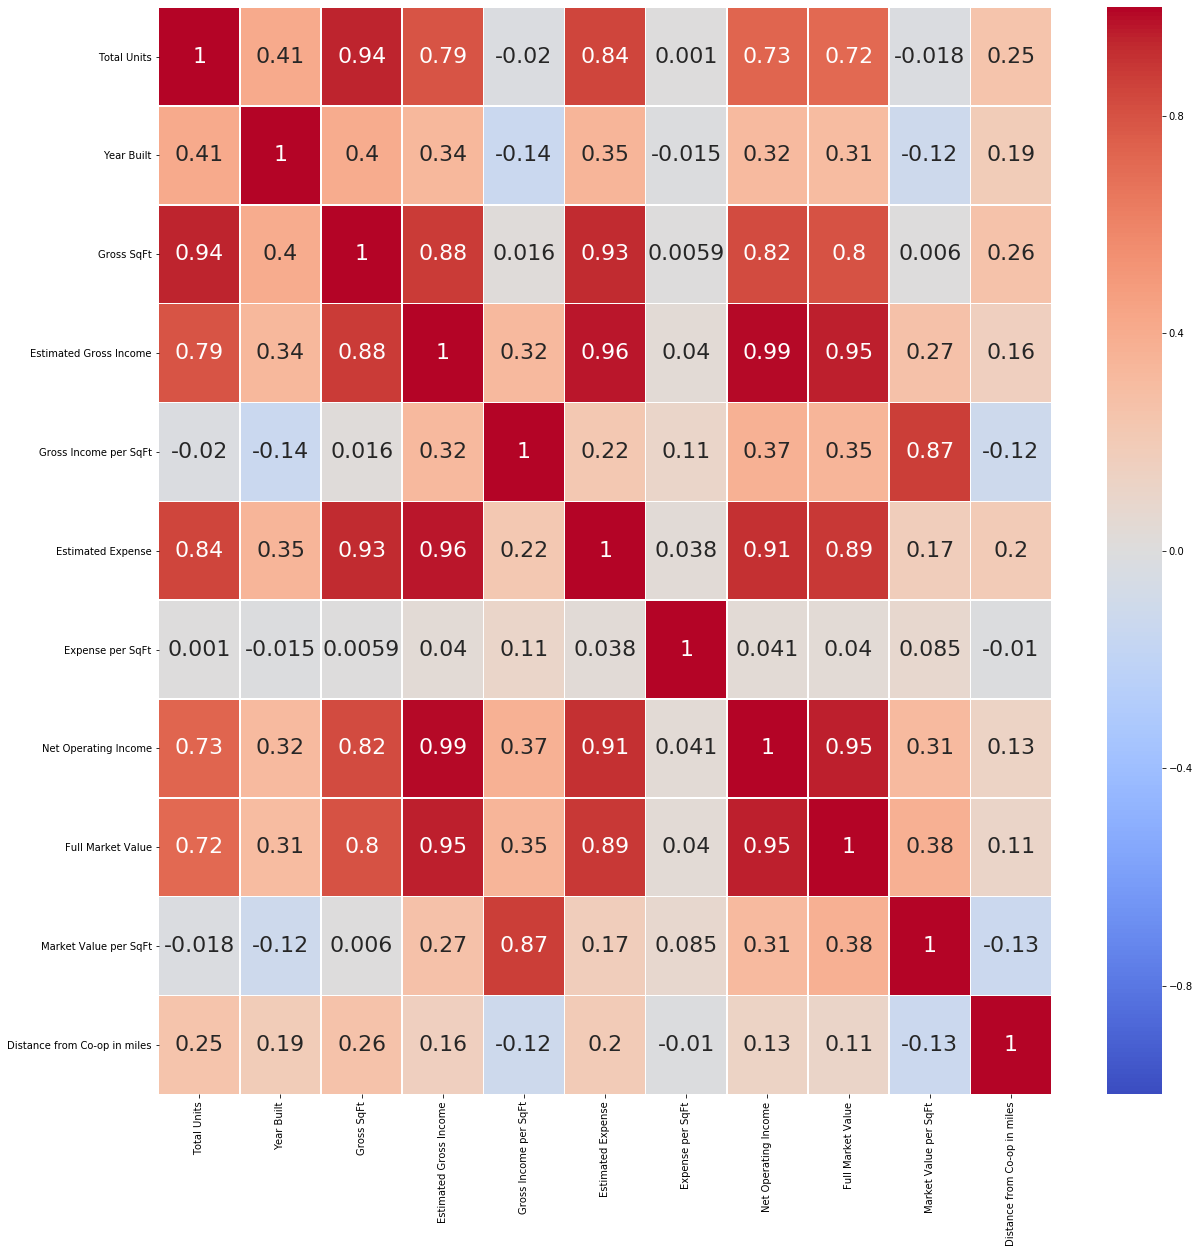

In [154]:
plt.figure(figsize=(20,20))
sns.heatmap(corr2, annot=True, linewidths=.5, vmin=-1, cmap='coolwarm', annot_kws={'fontsize':22})

In [155]:
corr3 = condos[['Total Units', 'Year Built', 'Gross SqFt',\
                         'Estimated Gross Income', 'Gross Income per SqFt', \
                         'Estimated Expense', 'Expense per SqFt', 'Net Operating Income',\
                         'Full Market Value', 'Market Value per SqFt', 'Distance from Co-op in miles']].corr()

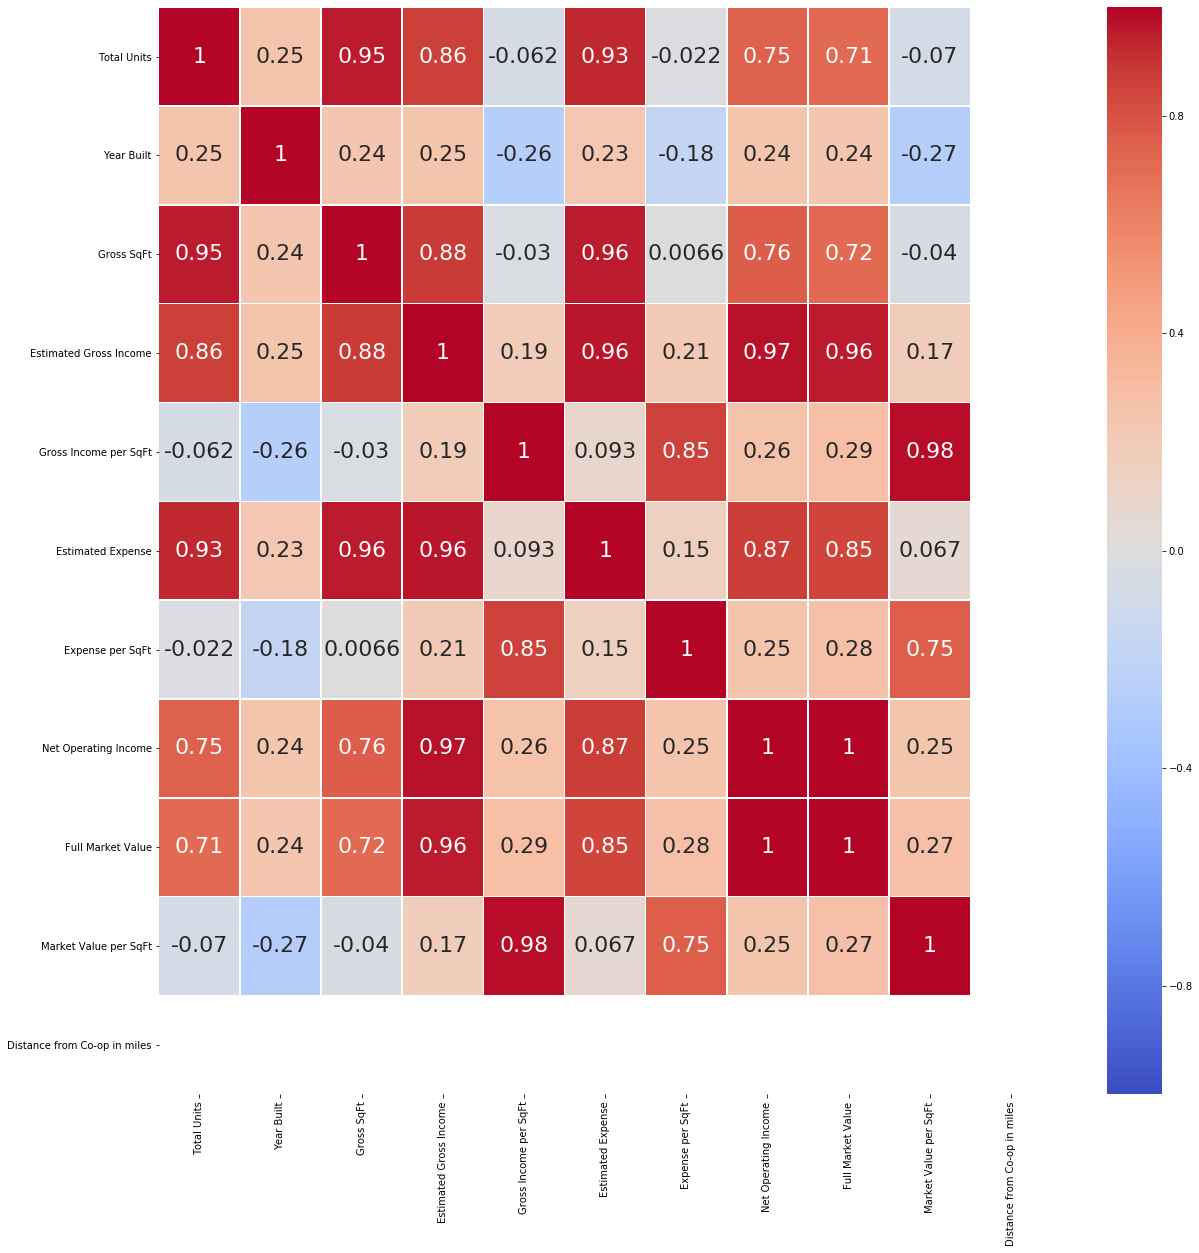

In [156]:
plt.figure(figsize=(20,20))
sns.heatmap(corr3, annot=True, linewidths=.5, vmin=-1, cmap='coolwarm', annot_kws={'fontsize':22})

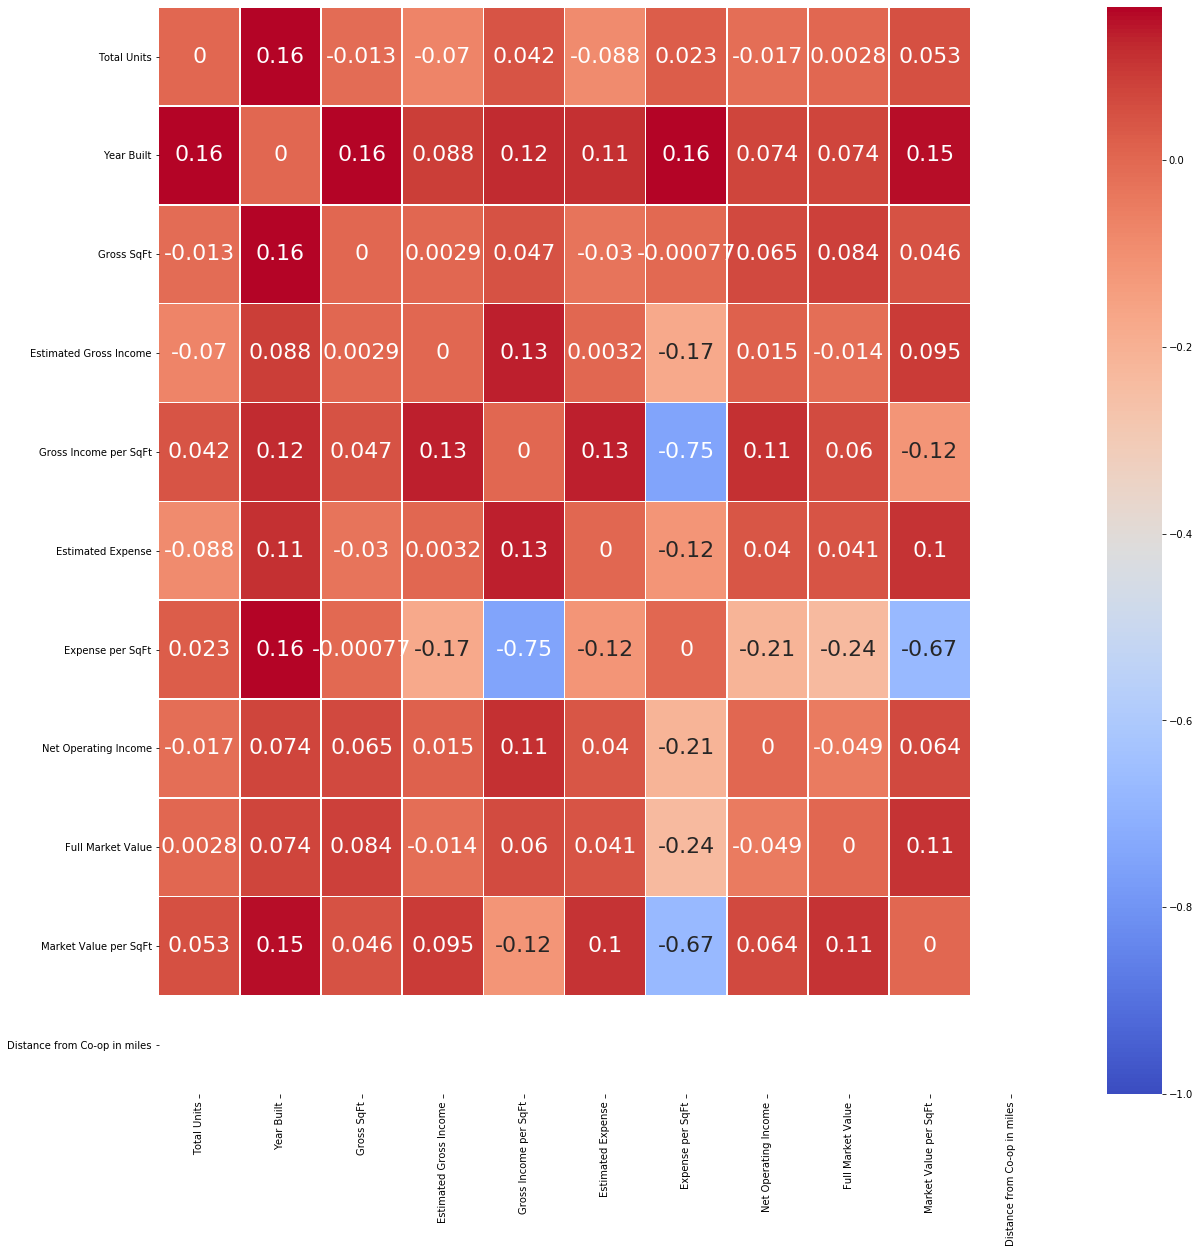

In [157]:
plt.figure(figsize=(20,20))
sns.heatmap(corr2-corr3, annot=True, linewidths=.5, vmin=-1, cmap='coolwarm', annot_kws={'fontsize':22})

sns.pairplot(data=allbuildings[['Total Units', 'Year Built', 'Gross SqFt',\
                         'Estimated Gross Income', 'Gross Income per SqFt', \
                         'Estimated Expense', 'Expense per SqFt', 'Net Operating Income',\
                         'Full Market Value', 'Market Value per SqFt', 'Distance from Co-op in miles']])

In [158]:
comparablerentals.describe()

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Distance from Co-op in miles,Report Year,Estimated,Condo Reference
count,86910.000000,86910.000000,8.691000e+04,8.690900e+04,86910.000000,8.690900e+04,86910.000000,8.690700e+04,8.691000e+04,86910.000000,86909.00000,86910.000000,86910.0,86910.000000
mean,74.607755,1934.393821,7.506940e+04,1.968185e+06,25.949679,7.556250e+05,9.911747,1.212592e+06,9.843904e+06,130.410457,0.52016,2015.018352,0.0,15779.276631
std,90.877741,23.857933,9.821186e+04,2.991933e+06,12.426698,1.121548e+06,27.640228,1.933078e+06,1.696167e+07,90.518294,0.71543,2.013954,0.0,8971.132772
min,11.000000,1840.000000,2.940000e+03,5.112000e+04,1.170000,2.374000e+03,0.090000,-1.532600e+04,1.260000e+05,8.920000,0.00000,2012.000000,0.0,0.000000
25%,26.000000,1920.000000,2.075000e+04,4.717860e+05,15.370000,1.862550e+05,7.040000,2.748905e+05,2.053000e+06,56.340000,0.15000,2013.000000,0.0,8091.000000
50%,52.000000,1929.000000,5.100000e+04,1.019552e+06,21.310000,4.195790e+05,9.130000,5.823960e+05,4.403000e+06,98.070000,0.33000,2015.000000,0.0,15755.500000
75%,90.000000,1951.000000,9.675200e+04,2.220899e+06,36.280000,8.868970e+05,11.850000,1.325757e+06,1.060000e+07,193.870000,0.62000,2017.000000,0.0,23527.000000
max,8805.000000,2014.000000,8.942176e+06,2.194410e+08,108.150000,9.469764e+07,8089.000000,1.247434e+08,1.360162e+09,699.630000,12.93000,2018.000000,0.0,31347.000000


In [159]:
condos.describe()

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Report Year,Estimated,Distance from Co-op in miles,Condo Reference
count,31348.000000,31348.000000,3.134800e+04,3.134800e+04,31348.000000,3.134800e+04,31348.000000,3.134800e+04,3.134800e+04,31348.000000,31348.000000,31348.0,31348.0,31348.000000
mean,84.887010,1933.831632,9.427731e+04,2.337767e+06,25.756867,9.294405e+05,9.798219,1.408327e+06,1.067694e+07,121.371366,2014.958371,1.0,0.0,15673.500000
std,218.243338,21.587933,2.458489e+05,4.771088e+06,12.131318,2.235698e+06,3.487425,2.693417e+06,2.057909e+07,77.021721,2.021124,0.0,0.0,9049.532456
min,11.000000,1840.000000,3.867000e+03,5.118800e+04,5.660000,1.197200e+04,1.610000,2.646200e+04,1.720000e+05,10.710000,2012.000000,1.0,0.0,0.000000
25%,24.000000,1920.000000,2.199400e+04,4.995520e+05,15.360000,2.005340e+05,7.080000,2.923282e+05,2.096000e+06,54.800000,2013.000000,1.0,0.0,7836.750000
50%,49.000000,1930.000000,5.591700e+04,1.147131e+06,21.110000,4.679605e+05,9.140000,6.572970e+05,4.760000e+06,90.100000,2015.000000,1.0,0.0,15673.500000
75%,94.000000,1953.000000,1.095620e+05,2.584130e+06,36.002500,1.036984e+06,11.780000,1.538782e+06,1.159400e+07,187.410000,2017.000000,1.0,0.0,23510.250000
max,10948.000000,2014.000000,1.354011e+07,1.862984e+08,91.920000,1.136015e+08,28.690000,1.121524e+08,8.973160e+08,567.980000,2018.000000,1.0,0.0,31347.000000


In [160]:
print(allbuildings['Gross Income per SqFt'].min())
print(allbuildings['Gross Income per SqFt'].max())

3.21
108.15


In [161]:
np.mean(allbuildings['Gross SqFt'])

80162.35757775635

In [162]:
print(comparable3.shape)
print(comparable2.shape)
print(comparable1.shape)

(24470, 18)
(31092, 18)
(31348, 18)


Text(0.5, 1, 'Difference in Comparable Building 2 & 3 Gross Income per SqFt')

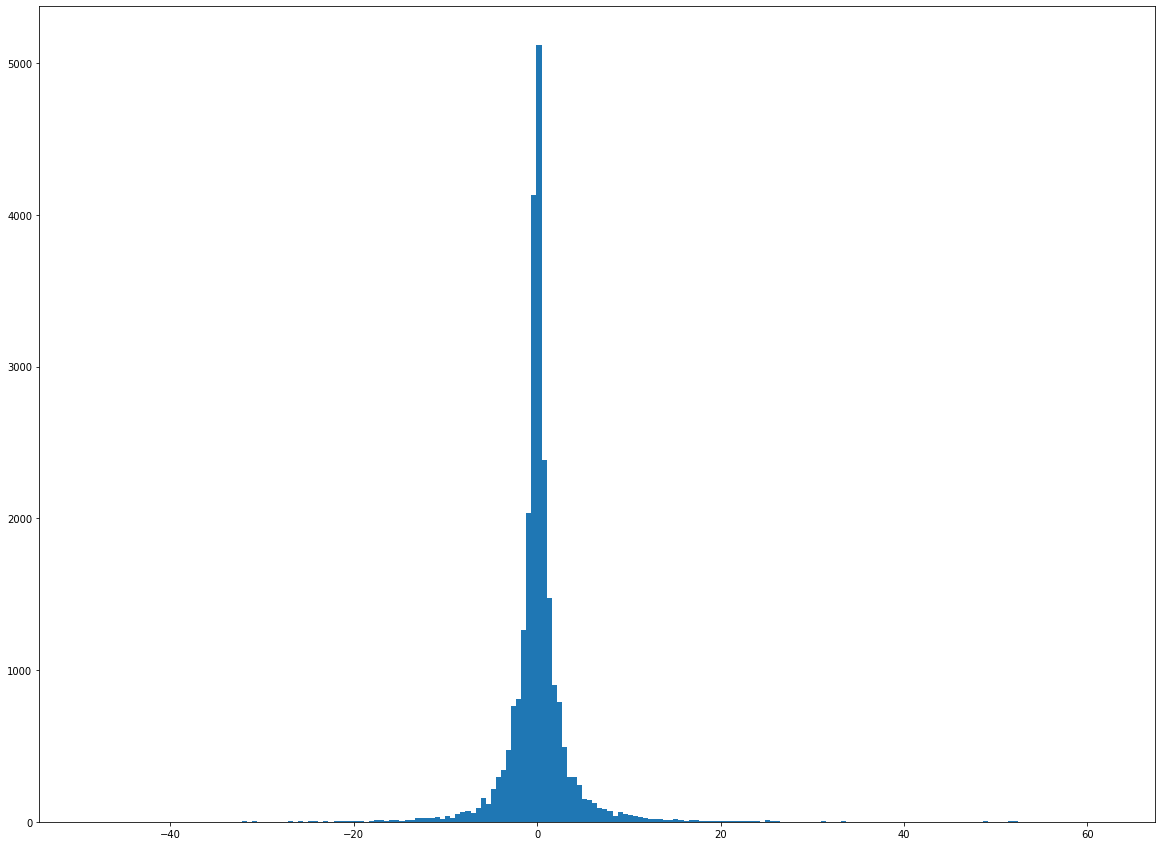

In [163]:
plt.figure(figsize=(20,15))
plt.hist((comparable2['Gross Income per SqFt'] - comparable3['Gross Income per SqFt']), bins=200)
axes.set_title('Difference in Comparable Building 2 & 3 Gross Income per SqFt')

Text(0.5, 1.0, 'Comparable Building 2 Greater Gross Income per SqFt')

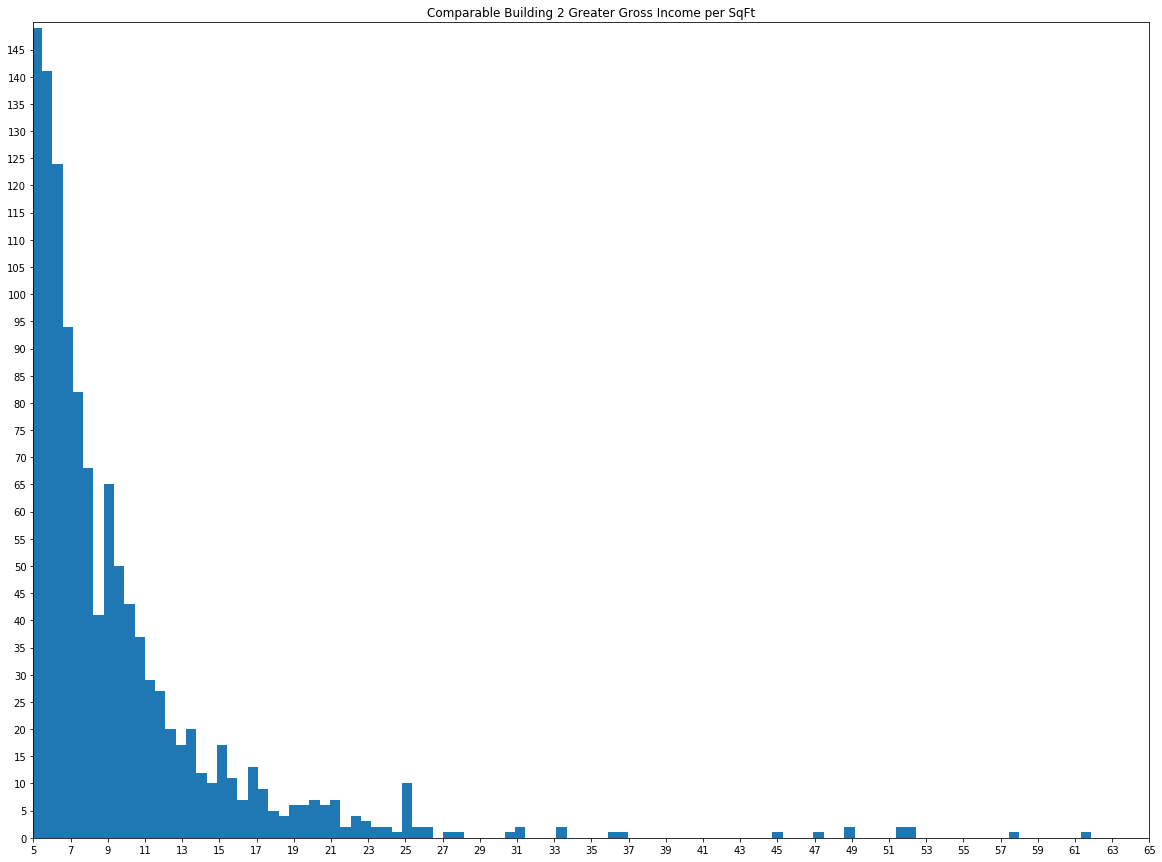

In [164]:
plt.figure(figsize=(20,15))
plt.hist((comparable2['Gross Income per SqFt'] - comparable3['Gross Income per SqFt']), bins=200)
axes = plt.gca()
axes.set_xlim([5,65])
axes.set_ylim([0,150])
axes.set_xticks(np.arange(5, 66, step=2))
axes.set_yticks(np.arange(0, 150, step=5))
axes.set_title('Comparable Building 2 Greater Gross Income per SqFt')

Text(0.5, 1.0, 'Comparable Building 2 Greater Gross Income per SqFt')

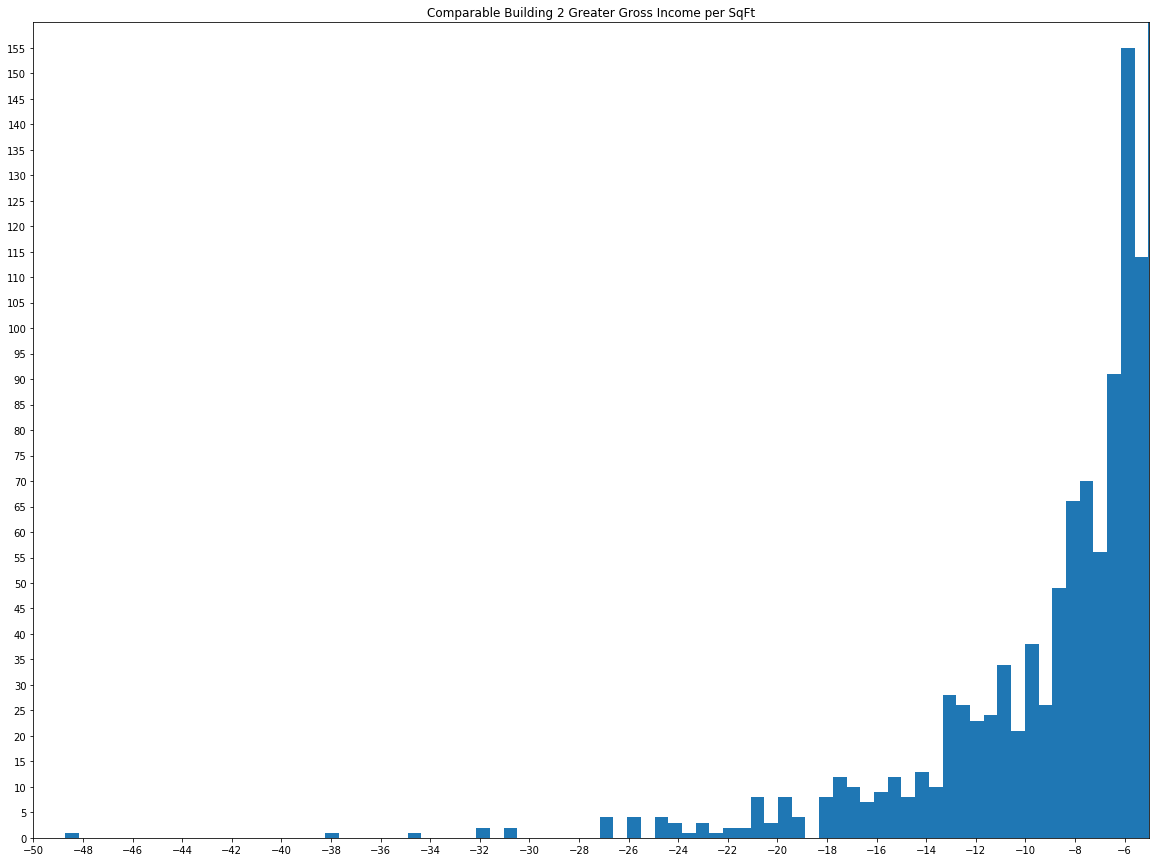

In [165]:
plt.figure(figsize=(20,15))
plt.hist((comparable2['Gross Income per SqFt'] - comparable3['Gross Income per SqFt']), bins=200)
axes = plt.gca()
axes.set_xlim([-50, -5])
axes.set_ylim([0,160])
axes.set_xticks(np.arange(-50, -5, step=2))
axes.set_yticks(np.arange(0, 160, step=5))
axes.set_title('Comparable Building 2 Greater Gross Income per SqFt')

Text(0.5, 1, 'Difference in Comparable Building 1 & 2 Gross Income per SqFt')

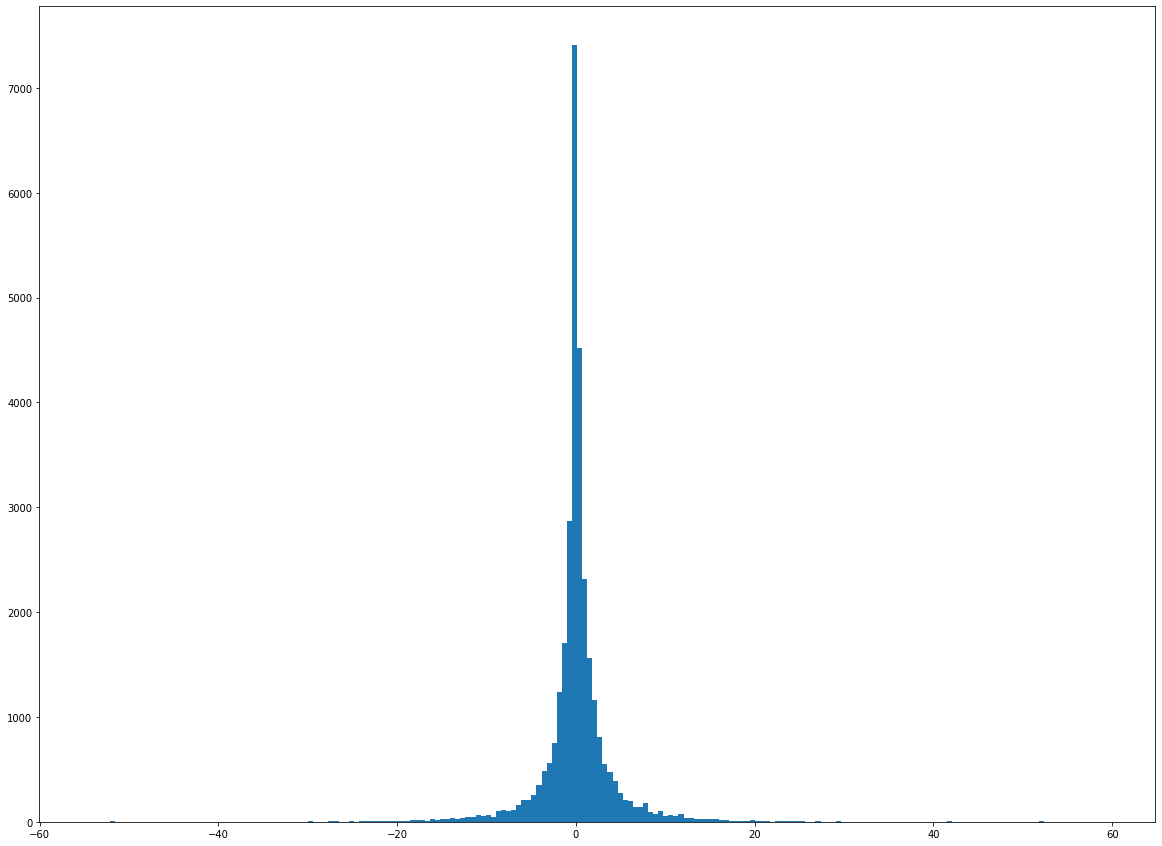

In [166]:
plt.figure(figsize=(20,15))
plt.hist((comparable1['Gross Income per SqFt'] - comparable2['Gross Income per SqFt']), bins=200)
axes.set_title('Difference in Comparable Building 1 & 2 Gross Income per SqFt')

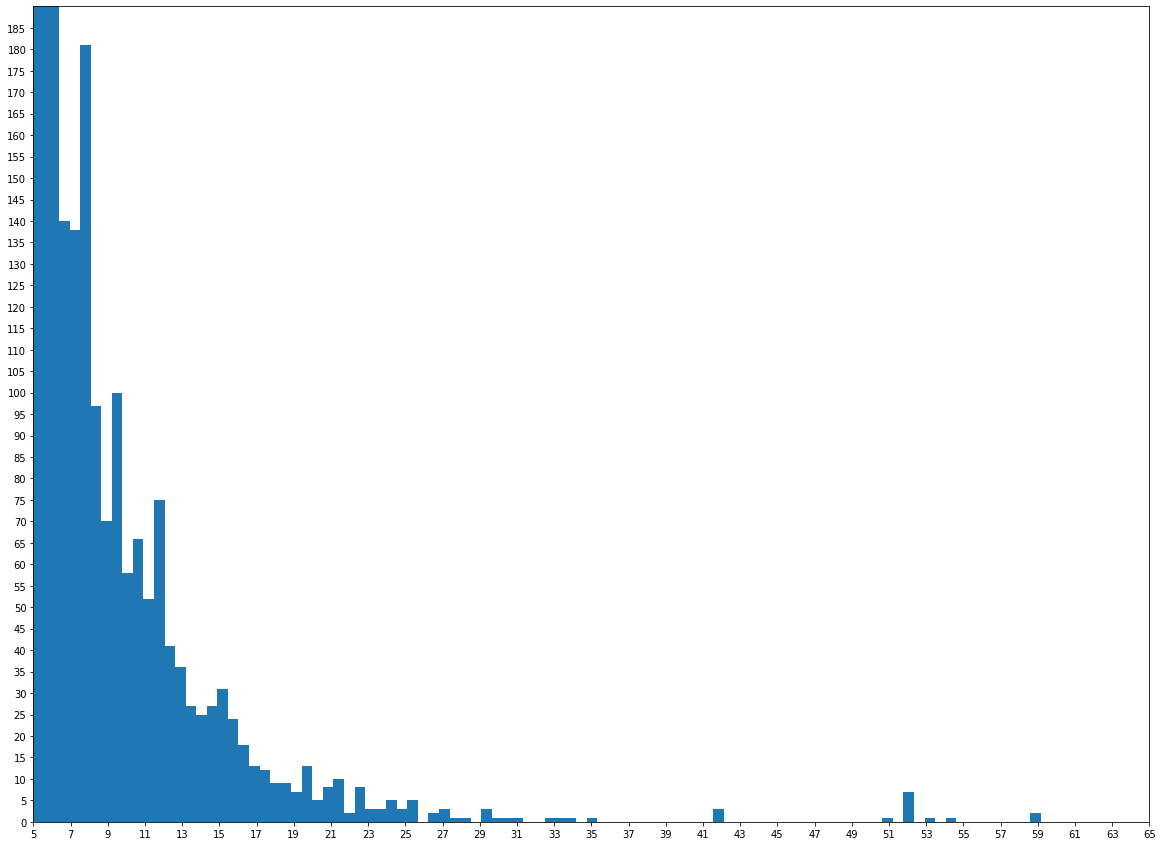

In [167]:
plt.figure(figsize=(20,15))
plt.hist((comparable1['Gross Income per SqFt'] - comparable2['Gross Income per SqFt']), bins=200)
axes = plt.gca()
axes.set_xlim([5,65])
axes.set_ylim([0,190])
axes.set_xticks(np.arange(5, 66, step=2))
axes.set_yticks(np.arange(0, 190, step=5))

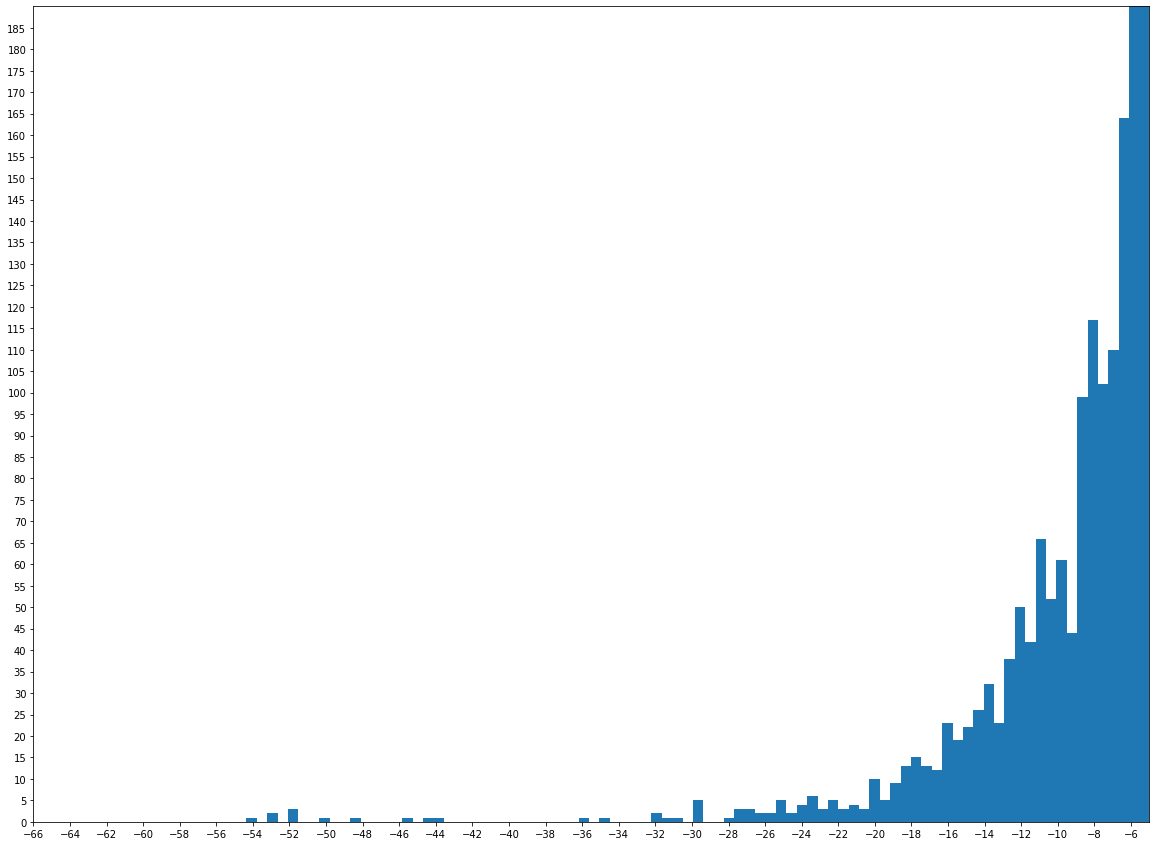

In [168]:
plt.figure(figsize=(20,15))
plt.hist((comparable1['Gross Income per SqFt'] - comparable2['Gross Income per SqFt']), bins=200)
axes = plt.gca()
axes.set_xlim([-65, -5])
axes.set_ylim([0,190])
axes.set_xticks(np.arange(-66, -5, step=2))
axes.set_yticks(np.arange(0, 190, step=5))

Text(0.5, 1, 'Difference in Comparable Building 1 & 3 Gross Income per SqFt')

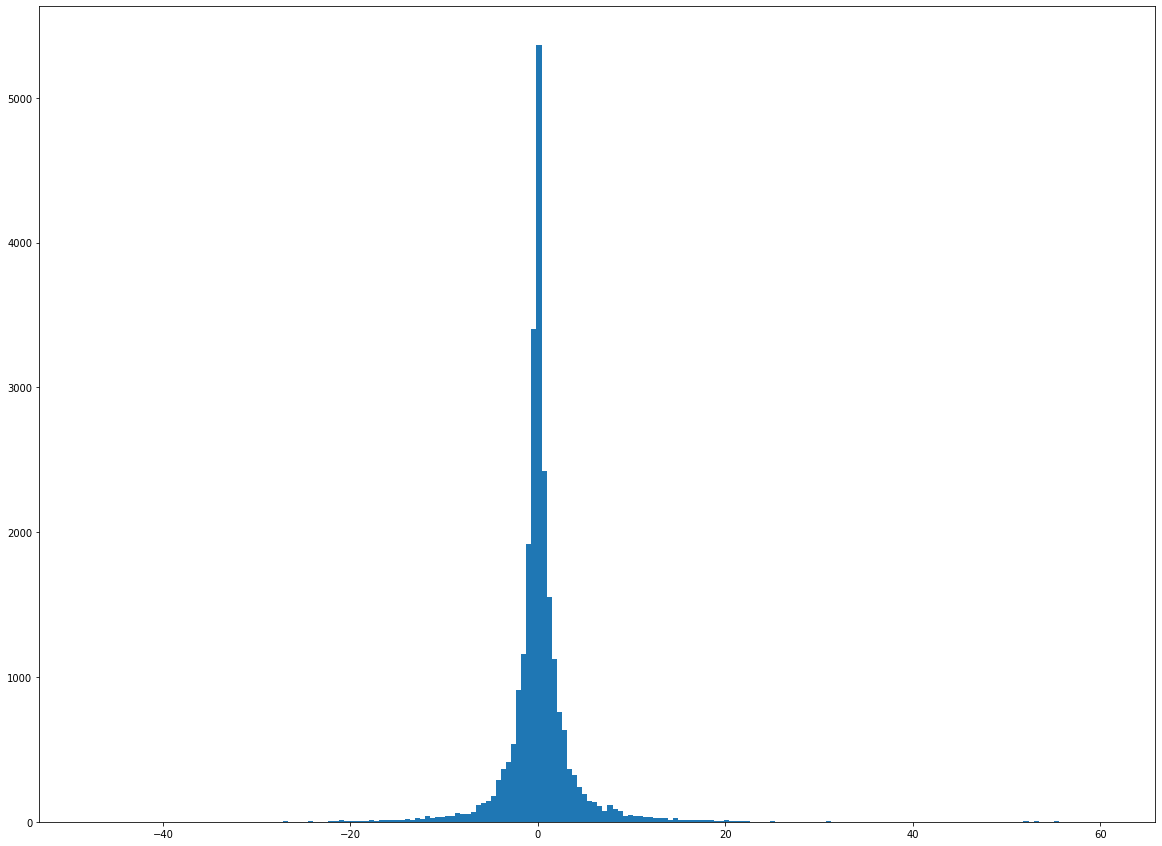

In [169]:
plt.figure(figsize=(20,15))
plt.hist((comparable1['Gross Income per SqFt'] - comparable3['Gross Income per SqFt']), bins=200)
axes.set_title('Difference in Comparable Building 1 & 3 Gross Income per SqFt')

In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import StratifiedKFold
import imp 


In [171]:
y = comparablerentals['Estimated Gross Income']
#x = comparablerentals.drop('Estimated Gross Income')

In [172]:
comparablerentals.columns

Index(['Boro-Block-Lot', 'Address', 'Neighborhood', 'Building Classification',
       'Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income',
       'Gross Income per SqFt', 'Estimated Expense', 'Expense per SqFt',
       'Net Operating Income', 'Full Market Value', 'Market Value per SqFt',
       'Distance from Co-op in miles', 'Report Year', 'Estimated',
       'Condo Reference'],
      dtype='object')

In [173]:
rentalneighborhoods = pd.get_dummies(comparablerentals['Neighborhood'])

In [174]:
rentalneighborhoods.shape

(86910, 208)

In [175]:
from sklearn.decomposition import PCA

In [176]:
neighborhood_pca = PCA(n_components=20)
neighborhood_pca.fit(rentalneighborhoods)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [177]:
neighborhoodcompents = neighborhood_pca.components_

In [178]:
neighborhood_eigenvals = neighborhood_pca.explained_variance_
neighborhood_ratio = neighborhood_pca.explained_variance_ratio_

print(('eigenvalues:', neighborhood_eigenvals, '/n'))
print(('explained variance pct:', neighborhood_ratio))
#not sure that dummy encoding the neighborhood variable and then using PCA will get us a better set of variables considering 


('eigenvalues:', array([0.07967302, 0.0512839 , 0.04613456, 0.02949806, 0.02902706,
       0.02801596, 0.02640721, 0.02554932, 0.024214  , 0.02285069,
       0.02164459, 0.02018096, 0.0182644 , 0.01734502, 0.01642365,
       0.01535795, 0.01482867, 0.01409059, 0.01353224, 0.0123943 ]), '/n')
('explained variance pct:', array([0.08158268, 0.05251311, 0.04724035, 0.0302051 , 0.0297228 ,
       0.02868747, 0.02704016, 0.02616171, 0.02479438, 0.0233984 ,
       0.02216339, 0.02066468, 0.01870217, 0.01776076, 0.0168173 ,
       0.01572606, 0.01518409, 0.01442832, 0.01385659, 0.01269138]))


In [326]:
comparablerentals.head()

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Distance from Co-op in miles,Report Year,Estimated,Condo Reference,Borough
0,1-00071-0001,156 FRONT STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,66.0,1930.0,52969.0,1834816.0,34.64,462069.0,8.72,1372747.0,10364000.0,195.66,0.35,2012,0,0,Manhattan
1,1-00016-0015,50 BATTERY PLACE MANHATTAN,TRIBECA,D8-ELEVATOR,209.0,1998.0,239165.0,6580344.0,27.51,1602924.0,6.70,4977420.0,37580000.0,157.13,0.56,2012,0,1,Manhattan
2,1-00077-0024,82 FULTON STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,205.0,1900.0,159000.0,5126869.0,32.24,1387789.0,8.73,3739080.0,28230000.0,177.55,0.15,2012,0,2,Manhattan
3,1-00077-0024,82 FULTON STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,205.0,1900.0,159000.0,5126869.0,32.24,1387789.0,8.73,3739080.0,28230000.0,177.55,0.16,2012,0,3,Manhattan
4,1-00761-0043,320 WEST 38 STREET MANHATTAN,FASHION,D8-ELEVATOR,570.0,2007.0,718503.0,15066042.0,20.97,4562301.0,6.35,10503741.0,178148000.0,247.94,3.15,2012,0,4,Manhattan


In [180]:
BBL = comparablerentals['Boro-Block-Lot'] 

In [181]:
BBL = BBL.str.split('-')

In [182]:
BBL = np.array(BBL)

In [183]:
print(BBL)

[list(['1', '00071', '0001']) list(['1', '00016', '0015'])
 list(['1', '00077', '0024']) ... list(['2', '05845', '1799'])
 list(['2', '05845', '1799']) list(['2', '05920', '0687'])]


In [184]:
BBL = [item[0] for item in BBL]

In [185]:
BBL.dtype

AttributeError: 'list' object has no attribute 'dtype'

In [186]:
comparablerentals.shape

(86910, 18)

In [187]:
def get_borough(BBL): 
    Borough = [] 
    for i in BBL: 
        if i == '1':
            Borough.append('Manhattan')
        elif i == '2': 
            Borough.append('The Bronx')
        elif i == '3': 
            Borough.append('Brooklyn')
        elif i == '4': 
            Borough.append('Queens')
        elif i == '5': 
            Borough.append('Staten Island')
    return Borough

In [188]:
comparablerentals.shape

(86910, 18)

In [189]:
Boroughlist = get_borough(BBL)

In [190]:

Counter(Boroughlist).keys()
Counter(Boroughlist).values()

dict_values([46942, 15145, 16832, 7536, 455])

In [191]:
comparablerentals['Borough'] = Boroughlist

In [192]:
comparablerentals.head()

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Distance from Co-op in miles,Report Year,Estimated,Condo Reference,Borough
0,1-00071-0001,156 FRONT STREET,FINANCIAL,D7-ELEVATOR,66.0,1930.0,52969.0,1834816.0,34.64,462069.0,8.72,1372747.0,10364000.0,195.66,0.35,2012,0,0,Manhattan
1,1-00016-0015,50 BATTERY PLACE,TRIBECA,D8-ELEVATOR,209.0,1998.0,239165.0,6580344.0,27.51,1602924.0,6.70,4977420.0,37580000.0,157.13,0.56,2012,0,1,Manhattan
2,1-00077-0024,82 FULTON STREET,FINANCIAL,D7-ELEVATOR,205.0,1900.0,159000.0,5126869.0,32.24,1387789.0,8.73,3739080.0,28230000.0,177.55,0.15,2012,0,2,Manhattan
3,1-00077-0024,82 FULTON STREET,FINANCIAL,D7-ELEVATOR,205.0,1900.0,159000.0,5126869.0,32.24,1387789.0,8.73,3739080.0,28230000.0,177.55,0.16,2012,0,3,Manhattan
4,1-00761-0043,320 WEST 38 STREET,FASHION,D8-ELEVATOR,570.0,2007.0,718503.0,15066042.0,20.97,4562301.0,6.35,10503741.0,178148000.0,247.94,3.15,2012,0,4,Manhattan


In [193]:
comparablerentals['Address'] = comparablerentals['Address'] + ' ' + comparablerentals['Borough']

In [194]:
comparablerentals['Address'] = comparablerentals['Address'].map(lambda x: str(x).upper())

comparablerentals.drop(columns='Borough', inplace=True)

In [195]:
bldgclassdummies = pd.get_dummies(comparablerentals['Building Classification'])

In [196]:
bldgclassdummies.shape

(86910, 26)

In [197]:
from sklearn.decomposition import PCA
bldgclasspca = PCA(n_components=10)
classpca = bldgclasspca.fit(bldgclassdummies)

In [198]:
bldgclass_eigenvals = classpca.explained_variance_
bldgclass_ratio = classpca.explained_variance_ratio_

print(('eigenvalues:', bldgclass_eigenvals))
print(('explained variance pct:', bldgclass_ratio))
#not sure that dummy encoding the neighborhood variable and then using PCA will get us a better set of variables considering 


('eigenvalues:', array([0.2154283 , 0.11753431, 0.09238487, 0.07541812, 0.05893571,
       0.04905169, 0.04741012, 0.04273565, 0.03188359, 0.02733378]))
('explained variance pct:', array([0.24465076, 0.13347763, 0.10491671, 0.08564846, 0.06693023,
       0.05570547, 0.05384122, 0.04853266, 0.03620854, 0.03104156]))


In [199]:
#my by reducing the dimensionality of the building class variable from 26 to 10 we can explain
# 86% of the variance within the building class variable 
0.24465076 + 0.13347763 + 0.10491671 + 0.08564846 + 0.06693023 + 0.05570547 + 0.05384122 + 0.04853266 + 0.03620854 + 0.03104156

0.8609532400000001

In [200]:
classpcatransform = classpca.transform(bldgclassdummies)

In [201]:
classpcatransform = pd.DataFrame(classpcatransform)

In [202]:
classpcatransform.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.248502,-0.172037,-0.109416,0.613829,0.705194,0.044622,-0.003579,-0.058833,-0.074751,-0.021196
1,-0.179442,-0.082136,-0.035526,0.097492,-0.073891,-0.016083,0.001485,0.035096,0.095294,0.037472
2,-0.248502,-0.172037,-0.109416,0.613829,0.705194,0.044622,-0.003579,-0.058833,-0.074751,-0.021196
3,-0.248502,-0.172037,-0.109416,0.613829,0.705194,0.044622,-0.003579,-0.058833,-0.074751,-0.021196
4,-0.179442,-0.082136,-0.035526,0.097492,-0.073891,-0.016083,0.001485,0.035096,0.095294,0.037472


In [203]:
classpcatransform.rename(columns= {0: 'Building Class PCA 1', 1: 'Building Class PCA 2', 2: 'Building Class PCA 3',\
                         3: 'Building Class PCA 4', 4: 'Building Class PCA 5', 5: 'Building Class PCA 6',\
                         6: 'Building Class PCA 7', 7: 'Building Class PCA 8', 8: 'Building Class PCA 9', 9: 'Building Class PCA 10'}, inplace=True)

In [204]:
classpcatransform.index = classpcatransform.index.map(str)

In [205]:
classpcatransform.head()

,Building Class PCA 1,Building Class PCA 2,Building Class PCA 3,Building Class PCA 4,Building Class PCA 5,Building Class PCA 6,Building Class PCA 7,Building Class PCA 8,Building Class PCA 9,Building Class PCA 10
0,-0.248502,-0.172037,-0.109416,0.613829,0.705194,0.044622,-0.003579,-0.058833,-0.074751,-0.021196
1,-0.179442,-0.082136,-0.035526,0.097492,-0.073891,-0.016083,0.001485,0.035096,0.095294,0.037472
2,-0.248502,-0.172037,-0.109416,0.613829,0.705194,0.044622,-0.003579,-0.058833,-0.074751,-0.021196
3,-0.248502,-0.172037,-0.109416,0.613829,0.705194,0.044622,-0.003579,-0.058833,-0.074751,-0.021196
4,-0.179442,-0.082136,-0.035526,0.097492,-0.073891,-0.016083,0.001485,0.035096,0.095294,0.037472


frames = [comparablerentals, classpcatransform]

copmarablerentals = pd.concat(frames, axis=0, sort=False)

In [310]:
boroughdummies = pd.get_dummies(comparablerentals['Borough'])

In [311]:
boroughdummies.head()

,Brooklyn,Manhattan,Queens,Staten Island,The Bronx
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [312]:
boroughpca = PCA(n_components=5)
boroughpca = boroughpca.fit(boroughdummies)

In [313]:
borough_eigenvals = boroughpca.explained_variance_
borough_ratio = boroughpca.explained_variance_ratio_

print(('eigenvalues:', borough_eigenvals))
print(('explained variance pct:', borough_ratio))
#by eliminating two inputs of 5 I can still capture 97.9% of the variance- 
#this is likely because there are fewer condos in the Bronx and Staten Island


('eigenvalues:', array([3.41127487e-01, 1.83306763e-01, 1.01927791e-01, 6.49190721e-03,
       1.01367815e-27]))
('explained variance pct:', array([5.39030353e-01, 2.89650975e-01, 1.61060528e-01, 1.02581444e-02,
       1.60175686e-27]))


In [314]:
pca_borough = PCA(n_components=3)
boroughpca = pca_borough.fit_transform(boroughdummies)

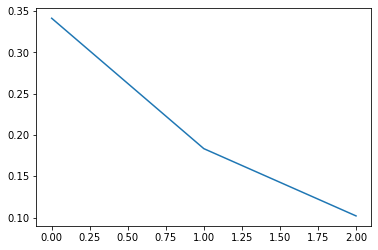

In [315]:
plt.plot(pca_borough.explained_variance_)

In [316]:
boroughpca = pd.DataFrame(boroughpca)

In [307]:
boroughpca.rename(columns={0:'Borough PCA 1', 1:'Borough PCA 2', 2: 'Borough PCA 3'}, inplace=True)

,0,1,2
0,-0.534149,-0.019101,-0.034965
1,-0.534149,-0.019101,-0.034965
2,-0.534149,-0.019101,-0.034965
3,-0.534149,-0.019101,-0.034965
4,-0.534149,-0.019101,-0.034965
5,-0.534149,-0.019101,-0.034965
6,-0.534149,-0.019101,-0.034965
7,-0.534149,-0.019101,-0.034965
8,-0.534149,-0.019101,-0.034965
9,-0.534149,-0.019101,-0.034965


In [333]:
pd.concat([comparablerentals.reset_index(drop=True),boroughpca],axis=1)

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,...,Full Market Value,Market Value per SqFt,Distance from Co-op in miles,Report Year,Estimated,Condo Reference,Borough,0,1,2
0,1-00071-0001,156 FRONT STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,66.0,1930.0,52969.0,1834816.0,34.64,462069.0,...,10364000.0,195.66,0.35,2012,0,0,Manhattan,-0.534149,-0.019101,-0.034965
1,1-00016-0015,50 BATTERY PLACE MANHATTAN,TRIBECA,D8-ELEVATOR,209.0,1998.0,239165.0,6580344.0,27.51,1602924.0,...,37580000.0,157.13,0.56,2012,0,1,Manhattan,-0.534149,-0.019101,-0.034965
2,1-00077-0024,82 FULTON STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,205.0,1900.0,159000.0,5126869.0,32.24,1387789.0,...,28230000.0,177.55,0.15,2012,0,2,Manhattan,-0.534149,-0.019101,-0.034965
3,1-00077-0024,82 FULTON STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,205.0,1900.0,159000.0,5126869.0,32.24,1387789.0,...,28230000.0,177.55,0.16,2012,0,3,Manhattan,-0.534149,-0.019101,-0.034965
4,1-00761-0043,320 WEST 38 STREET MANHATTAN,FASHION,D8-ELEVATOR,570.0,2007.0,718503.0,15066042.0,20.97,4562301.0,...,178148000.0,247.94,3.15,2012,0,4,Manhattan,-0.534149,-0.019101,-0.034965
5,1-00071-0001,156 FRONT STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,66.0,1930.0,52969.0,1834816.0,34.64,462069.0,...,10364000.0,195.66,0.33,2012,0,5,Manhattan,-0.534149,-0.019101,-0.034965
6,1-00079-0010,17 JOHN STREET MANHATTAN,FINANCIAL,D8-ELEVATOR,114.0,1920.0,107243.0,4497582.0,41.94,1276764.0,...,24317000.0,226.75,0.16,2012,0,6,Manhattan,-0.534149,-0.019101,-0.034965
7,1-00097-0018,217 FRONT STREET MANHATTAN,SOUTHBRIDGE,D7-ELEVATOR,33.0,2004.0,40000.0,1458461.0,36.46,447968.0,...,7629000.0,190.73,0.12,2012,0,7,Manhattan,-0.534149,-0.019101,-0.034965
8,1-00075-0001,127 JOHN STREET MANHATTAN,FINANCIAL,D8-ELEVATOR,579.0,1973.0,541000.0,17637758.0,32.60,5884969.0,...,88734000.0,164.02,0.45,2012,0,8,Manhattan,-0.534149,-0.019101,-0.034965
9,1-00068-0016,84 WILLIAM STREET MANHATTAN,FINANCIAL,D9-ELEVATOR,123.0,1907.0,111184.0,5147164.0,46.29,1445424.0,...,27948000.0,251.37,0.42,2012,0,9,Manhattan,-0.534149,-0.019101,-0.034965


In [334]:
frames = [boroughpca, comparablerentals.reset_index(drop=True), classpcatransform]

In [335]:
pd.concat(frames,axis=1)

,0,1,2,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,...,Building Class PCA 1,Building Class PCA 2,Building Class PCA 3,Building Class PCA 4,Building Class PCA 5,Building Class PCA 6,Building Class PCA 7,Building Class PCA 8,Building Class PCA 9,Building Class PCA 10
0,-0.534149,-0.019101,-0.034965,1-00071-0001,156 FRONT STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,66.0,1930.0,52969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.534149,-0.019101,-0.034965,1-00016-0015,50 BATTERY PLACE MANHATTAN,TRIBECA,D8-ELEVATOR,209.0,1998.0,239165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.534149,-0.019101,-0.034965,1-00077-0024,82 FULTON STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,205.0,1900.0,159000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.534149,-0.019101,-0.034965,1-00077-0024,82 FULTON STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,205.0,1900.0,159000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.534149,-0.019101,-0.034965,1-00761-0043,320 WEST 38 STREET MANHATTAN,FASHION,D8-ELEVATOR,570.0,2007.0,718503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.534149,-0.019101,-0.034965,1-00071-0001,156 FRONT STREET MANHATTAN,FINANCIAL,D7-ELEVATOR,66.0,1930.0,52969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.534149,-0.019101,-0.034965,1-00079-0010,17 JOHN STREET MANHATTAN,FINANCIAL,D8-ELEVATOR,114.0,1920.0,107243.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.534149,-0.019101,-0.034965,1-00097-0018,217 FRONT STREET MANHATTAN,SOUTHBRIDGE,D7-ELEVATOR,33.0,2004.0,40000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.534149,-0.019101,-0.034965,1-00075-0001,127 JOHN STREET MANHATTAN,FINANCIAL,D8-ELEVATOR,579.0,1973.0,541000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.534149,-0.019101,-0.034965,1-00068-0016,84 WILLIAM STREET MANHATTAN,FINANCIAL,D9-ELEVATOR,123.0,1907.0,111184.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
THIS_WILL_WORK = pd.concat([comparablerentals.reset_index(drop=True),classpcatransform.reset_index(drop=True)],axis=1)

In [349]:
THIS_WILL_WORK.head().T

,0,1,2,3,4
Boro-Block-Lot,1-00071-0001,1-00016-0015,1-00077-0024,1-00077-0024,1-00761-0043
Address,156 FRONT STREET MANHATTAN,50 BATTERY PLACE MANHATTAN,82 FULTON STREET MANHATTAN,82 FULTON STREET MANHATTAN,320 WEST 38 STREET MANHATTAN
Neighborhood,FINANCIAL,TRIBECA,FINANCIAL,FINANCIAL,FASHION
Building Classification,D7-ELEVATOR,D8-ELEVATOR,D7-ELEVATOR,D7-ELEVATOR,D8-ELEVATOR
Total Units,66,209,205,205,570
Year Built,1930,1998,1900,1900,2007
Gross SqFt,52969,239165,159000,159000,718503
Estimated Gross Income,1.83482e+06,6.58034e+06,5.12687e+06,5.12687e+06,1.5066e+07
Gross Income per SqFt,34.64,27.51,32.24,32.24,20.97
Estimated Expense,462069,1.60292e+06,1.38779e+06,1.38779e+06,4.5623e+06


In [350]:
comparablerentals2.head().T

,0,0,0,1,1
Boro-Block-Lot,1-00071-0001,1-00065-0010,1-00065-0020,1-00016-0015,1-00016-0020
Address,156 FRONT STREET MANHATTAN,9 MAIDEN LANE MANHATTAN,12 JOHN STREET MANHATTAN,50 BATTERY PLACE MANHATTAN,70 BATTERY PLACE MANHATTAN
Neighborhood,FINANCIAL,FINANCIAL,FINANCIAL,TRIBECA,TRIBECA
Building Classification,D7-ELEVATOR,D5-ELEVATOR,D6-ELEVATOR,D8-ELEVATOR,D8-ELEVATOR
Total Units,66,68,20,209,210
Year Built,1930,1900,1900,1998,1998
Gross SqFt,52969,58354,31118,239165,230766
Estimated Gross Income,1.83482e+06,2.0874e+06,771607,6.58034e+06,6.19619e+06
Gross Income per SqFt,34.64,35.77,24.8,27.51,26.85
Estimated Expense,462069,742339,187390,1.60292e+06,1.72296e+06


In [ ]:
#dropping non-numerical columns so that I can use linerar regression 
comparablerentals2.drop(columns=['Boro-Block-Lot', 'Address', 'Neighborhood', 'Building Classification', \
                                                     'Condo Reference', 'Borough'], inplace=True)

allbldggeo = pd.read_csv('Address_Point.csv')

allbldggeo.head().T

allbldggeo.dtypes

allbldggeo['Street Address'] = allbldggeo['H_NO'] + ' ' + allbldggeo['FULL_STREE']

allbldggeo.columns

allbldggeo['Street Address'][allbldggeo['Street Address'].str.contains('AVE A')]

!pip install swifter
import swifter

allbuildings.Address.swifter.apply(lambda x : pd.Series(x.split())

allbuildings.Address.swifter.apply(lambda x : pd.Series(x.split())

ab_number = allbuildings.Address.swifter.apply(lambda x : x.split()[0])
ab_number

abg_streetnumber = allbldggeo['Street Address'].swifter.apply(lambda x : x.split()[0])
abg_streetnumber.head()

# ST

allbuildings.Address.swifter.apply(lambda x : x.split()[1:])



len(allbuildings.Address.swifter.apply(lambda x : x.split()[-1]).unique())

allbldggeo['Street Address'].swifter.apply(lambda x : x.split()[-1])

alADgeo.apply(lambda x : set(x.split()[1:]))

alAD.apply(lambda x : set(x.split()[1:]))

len(allbldggeo['Street Address'].swifter.apply(lambda x : x.split()[-1]).unique())

al_suffix  = allbldggeo['Street Address'].swifter.apply(lambda x : x.split()[-1]).unique()

alAD = allbuildings.Address
alADgeo = allbldggeo['Street Address'] 

alADgeo[alADgeo.apply(lambda x : set(x.split()[1:])) & {'AVENUE'}]

suffixes = alADgeo.swifter.apply(lambda x:x.split()[-1]).unique()

[suffix  for suffix in suffixes  if (1<len(suffix)<4) ]

allbldggeo['Street Address'].iloc[1:10].swifter.apply(lambda x : geocode(x, provider='nominatim'))

from geopandas.tools import geocode
# geo = geocode(data['addr'], provider='nominatim')

geocode(allbldg['Street Address'].iloc[1], provider='nominatim')

geocode(alAD.iloc[1], provider='nominatim')

# ZalAD.swifter.apply(geocode)

from tqdm.autonotebook import tqdm

geos = []

for add in tqdm(alAD.iteritems()):
    geos.append(geocode(add[1] , provider='nominatim'))
#     break

pd.concat(geos)

from geopy.geocoders import Nominatim

alAD.str.replace('AVENUE','AVE').str.replace('STREET','ST')

set(al_suffix)

alADgeo[alADgeo.str.contains(al_suffix[0])]

alADgeo[alADgeo.str.contains(al_suffix[0])]

allbuildings.Address.swifter.apply(lambda x : ' '.join(x.split()[-2:]))

allbuildings.Address[allbuildings.Address.str.contains('SOUTHWES')].head()

allbuildings.Address[allbuildings.Address.swifter.apply(lambda x : ' '.join(x.split()[-1:])).apply(lambda x:len(x))==1]

allbuildings.columns

allbldggeo.head()

allbuildings.head()

pwd

newgeopoints = pd.read_csv('Revised_Notice_of_Property_Value__RNOPV_.csv')

newgeopoints.isnull().sum()

newgeopoints.shape

latitude = [] 
longitude = [] 

for 

allbuildings['Boro-Block-Lot'].str.split('-')